##***1. Implementation of simple programs like vector addition in TensorFlow***

In [1]:
import tensorflow as tf
# Define two vectors
vector1 = tf.constant([1564, 4562, 5643])
vector2 = tf.constant([456, 545780, 6546])
# Perform vector addition
result = tf.add(vector1, vector2)
# Display the result
print("Vector Addition Result:")
print("-----------------------")
print("Vector 1:\t", end="")
print(*vector1.numpy(), sep=", ")
print("Vector 2:\t", end="")
print(*vector2.numpy(), sep=", ")
print("Result:\t", end="")
print(*result.numpy(), sep=", ")

Vector Addition Result:
-----------------------
Vector 1:	1564, 4562, 5643
Vector 2:	456, 545780, 6546
Result:	2020, 550342, 12189


##***2. Implementation of a simple problem like regression model in Keras.(Dataset)***

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
matches=pd.read_csv('/content/matches.csv')
ball=pd.read_csv('/content/deliveries.csv')
matches.describe()

In [ ]:
ball.describe()

In [ ]:
matches.info()

In [ ]:
ball.info()

In [ ]:
matches.isna().sum()

In [ ]:
ball.isna().sum()

In [ ]:
matches.city.unique()
array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
'Mohali', 'Bengaluru'], dtype=object)
matches[matches['city']=='Kolkata']

In [ ]:
def matches_city(matches):
matches['city'].replace(to_replace='Bengaluru',value='Bangalore',inplace=True)
matches_city(matches)
matches.city.fillna('Dubai',inplace=True)
matches.city.unique()
array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
'Dubai', 'Mohali'], dtype=object)
matches.team1.value_counts()

In [ ]:
matches.team1.unique()
array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
'Rising Pune Supergiant', 'Royal Challengers Bangalore',
'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
'Delhi Capitals'], dtype=object)
matches.replace(to_replace=['Rising Pune Supergiant','Pune Warriors'],value='Rising Pune Supergiants',inplace=True)
matches.replace(to_replace='Delhi Daredevils',value='Delhi Capitals',inplace=True)

***DATA CLEANING***

In [ ]:
matches.drop('umpire3',axis=1,inplace=True)
matches.isna().sum()

In [ ]:
len(matches)

In [ ]:
len(matches.columns)

In [ ]:
len(matches.season.unique())

In [ ]:
data=matches.winner.value_counts().reset_index()
data.columns=['team','no_of_time_won']
data

In [ ]:
data.iloc[0]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title('The most successful IPL team')
sns.barplot(x=data['no_of_time_won'], y=data['team'])
plt.show()

In [ ]:
data=matches.season.value_counts().reset_index()
data.columns=['season','total_matches']
data

In [ ]:
plt.title('Season vs Matches Played')
# sns.countplot(x='season',data=matches)
sns.barplot(x=data['season'],y=data['total_matches'])

In [ ]:
win_per_season = matches.groupby('season').winner.value_counts()
win_per_season

In [ ]:
win_per_season_df=pd.DataFrame(columns=['season','team','no_of_time_won'])
year=2008
for items in win_per_season.items():
if(items[0][0]==year):
print(items)
temp=pd.DataFrame({'season':[items[0][0]],'team':[items[0][1]],'no_of_time_won':[items[1]]})
win_per_season_df=win_per_season_df.append(temp,ignore_index=True)
year=year+1
((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Capitals'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)
win_per_season_df

In [ ]:
win_per_season_df.iloc[0]

***Which team had won by maximum runs?***

In [ ]:
matches.info()

In [ ]:
win_by_runs=matches.groupby('winner'). win_by_runs.value_counts()
win_by_runs

In [ ]:
matches.iloc[matches['win_by_runs'].idxmax()]

In [ ]:
matches.iloc[matches.win_by_runs.idxmax()].winner

In [ ]:
matches[matches.win_by_runs.ge(1)]

***Top player of the match Winners***

In [ ]:
data=matches.player_of_match.value_counts().reset_index()
data.columns=['Player_Name','No_of_time_player_of_match']
data=data.head(10)
data

In [ ]:
plt.title('Top 10 Player of the match')
sns.barplot(y=data['Player_Name'],x=data['No_of_time_player_of_match'])

In [ ]:
X = matches[['season', 'win_by_wickets']] # Choose relevant features as you wish
y = matches['win_by_runs']
# Calculate the interquartile range (IQR) for X and Y
Q1_X = X.quantile(0.25)
Q3_X = X.quantile(0.75)
IQR_X = Q3_X - Q1_X
Q1_Y = y.quantile(0.25)
Q3_Y = y.quantile(0.75)
IQR_Y = Q3_Y - Q1_Y
# Define the lower and upper bounds for X and Y
lower_bound_X = Q1_X - 1.5 * IQR_X
upper_bound_X = Q3_X + 1.5 * IQR_X
lower_bound_Y = Q1_Y - 1.5 * IQR_Y
upper_bound_Y = Q3_Y + 1.5 * IQR_Y
# Remove outliers from X and Y separately
X_filtered = X[(X >= lower_bound_X) & (X <= upper_bound_X)]
y_filtered = y[(y >= lower_bound_Y) & (y <= upper_bound_Y)]
# Display the shapes of the original and filtered datasets
print("Original X shape:", X.shape)
print("Filtered X shape:", X_filtered.shape)
print("Original y shape:", y.shape)
print("Filtered y shape:", y_filtered.shape)
Original X shape: (756, 2)
Filtered X shape: (756, 2)
Original y shape: (756,)
Filtered y shape: (698,)
# Normalize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Define the input dimension based on the number of features
input_dim = X_train.shape[1]
# Initialize the Sequential model
model = Sequential()
# Add a Dense layer with 1 unit and the input dimension
model.add(Dense(units=1, input_dim=input_dim))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Define batch size
batchSize = int(0.1 * X_train.shape[0])
# Fit the model to the training data epoch 1000, verbose = 1
model.fit(X_train, y_train, epochs=1000, batch_size=batchSize, verbose=1, validation_data=(X_test, y_test))
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Mean Squared Error:", loss)
Mean Squared Error: 358.1281433105469
import matplotlib.pyplot as plt
# Select the numerical columns from the matches DataFrame
numerical_cols = ['season', 'win_by_runs', 'win_by_wickets']
# Create separate box plots for each numerical column
plt.figure(figsize=(10, 6))
# Box plot for 'season'
plt.subplot(3, 1, 1)
plt.boxplot(matches['season'])
plt.title('Box Plot of Season')
# Box plot for 'win_by_runs'
plt.subplot(3, 1, 2)
plt.boxplot(matches['win_by_runs'])
plt.title('Box Plot of Win by Runs')
# Box plot for 'win_by_wickets'
plt.subplot(3, 1, 3)
plt.boxplot(matches['win_by_wickets'])
plt.title('Box Plot of Win by Wickets')
plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

##***3. Implementation of a perceptron in TensorFlow/Keras Environment.***

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


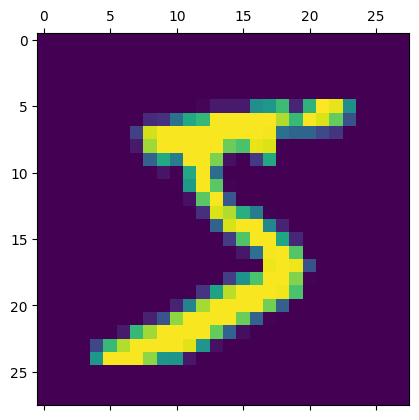

In [7]:
len(x_train)
len(x_test)
x_train[0].shape
plt.matshow(x_train[0])

In [8]:
# Normalizing the dataset
x_train = x_train/255
x_test = x_test/255
# Flatting the dataset in order # to compute for model building
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

In [9]:
model = keras.Sequential([ keras.layers.Dense(10, input_shape=(784,), activation='softmax') ])
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4648 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3038 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2833 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9255


In [10]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2673 - accuracy: 0.9249


[0.26726341247558594, 0.9248999953269958]

1/1 [==============================] - 0s 77ms/step
Predicted Digit for Test Image 56 : 4


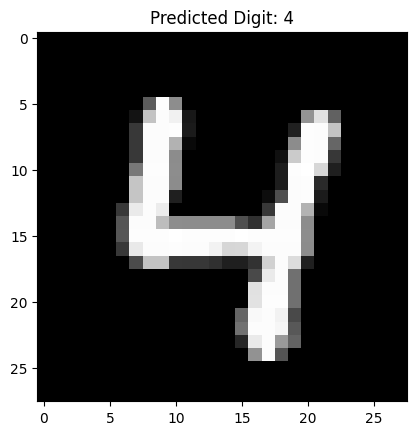

In [11]:
# Select a test image index (replace 0 with your desired index)
selected_image_index = 56
# Get the preprocessed image from the test set
test_image = x_test_flatten[selected_image_index]
# Reshape the image back to 2D for visualization (assuming flattened)
test_image_reshaped = test_image.reshape(28, 28)
# Make prediction on the selected test image
prediction = model.predict(np.array([test_image]))
# Get the index of the class with the highest probability
predicted_class = np.argmax(prediction)
print("Predicted Digit for Test Image", selected_image_index, ":", predicted_class)
# Plot the actual image
plt.imshow(test_image_reshaped, cmap='gray')
plt.title('Predicted Digit: ' + str(predicted_class))
plt.show()

##***4. Implementation of a Feed-Forward Network in TensorFlow/Keras.***

In [15]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Preprocess data
x_train = x_train.reshape(60000, 784) # Flatten 28x28 images
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') / 255 # Normalize pixel intensities
x_test = x_test.astype('float32') / 255
# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# Define the neural network model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(784,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax')) # Output layer with 10 neurons (one for each digit) and softmax activation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32) # Train for 5 epochs with batch size of 32
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2362 - accuracy: 0.9306
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0988 - accuracy: 0.9704
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0713 - accuracy: 0.9775
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0541 - accuracy: 0.9822
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0787 - accuracy: 0.9763
Test loss: 0.07866694033145905
Test accuracy: 0.9763000011444092


In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 59ms/step
Predicted Digit for Test Image 98 : 6


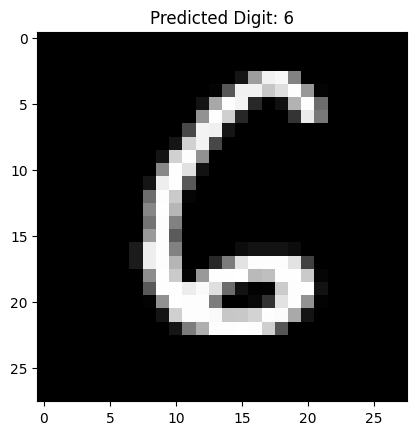

In [18]:
# Select a test image index (replace 0 with your desired index)
selected_image_index = 98
# Get the preprocessed image from the test set
test_image = x_test_flatten[selected_image_index]
# Reshape the image back to 2D for visualization (assuming flattened)
test_image_reshaped = test_image.reshape(28, 28)
# Make prediction on the selected test image
prediction = model.predict(np.array([test_image]))
# Get the index of the class with the highest probability
predicted_class = np.argmax(prediction)
print("Predicted Digit for Test Image", selected_image_index, ":", predicted_class)
# Plot the actual image
plt.imshow(test_image_reshaped, cmap='gray')
plt.title('Predicted Digit: ' + str(predicted_class))
plt.show()

##***5. Implementation of an Image Classifier using CNN in TensorFlow/Keras.(Dataset)***

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 120)              

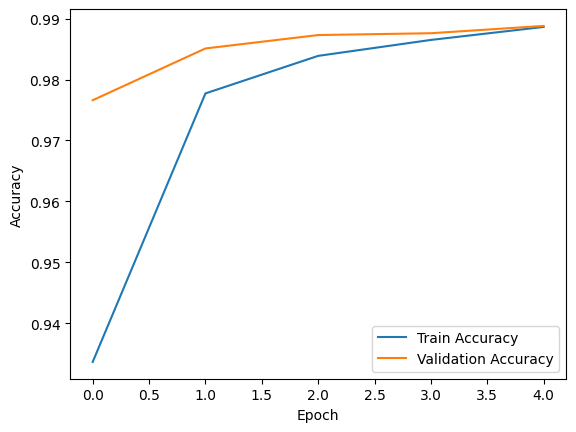

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model = models.Sequential([ layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)), layers.MaxPooling2D((2, 2)), layers.Conv2D(16, (5, 5), activation='relu'), layers.MaxPooling2D((2, 2)), layers.Flatten(), layers.Dense(120, activation='relu'), layers.Dense(84, activation='relu'), layers.Dense(10, activation='softmax') ])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary() # Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 112ms/step


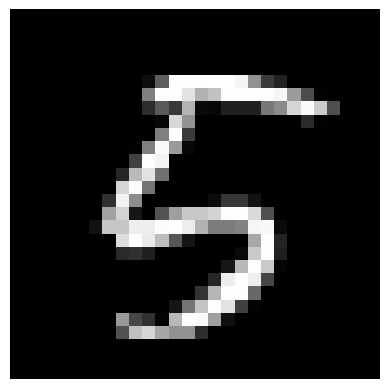

True Label: 5
Predicted Label: 5


In [20]:
import random
import numpy as np
# Choose a random index from the test dataset
idx = random.randint(0, len(test_images))
random_image = test_images[idx]
random_label = test_labels[idx]
random_image = np.expand_dims(random_image, axis=0)
prediction = model.predict(random_image)
predicted_label = np.argmax(prediction)
plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()
print("True Label:", np.argmax(random_label))
print("Predicted Label:", predicted_label)

***CNN Classifier for Cat & Dog***

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
X_train = np.loadtxt('/content/drive/MyDrive/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/labels.csv', delimiter = ',')
X_test = np.loadtxt('/content/drive/MyDrive/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/labels_test.csv', delimiter = ',')

In [24]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)
X_train = X_train/255.0
X_test = X_test/255.0

NameError: name 'X_train' is not defined

In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

In [ ]:
idx = random .randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [ ]:
model = Sequential([ Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)), MaxPooling2D((2,2)), Conv2D(32, (3,3), activation = 'relu'), MaxPooling2D((2,2)), Flatten(), Dense(64, activation = 'relu'), Dense(1, activation = 'sigmoid') ])

In [ ]:
model = Sequential()
model.add (Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add (Flatten())
model.add (Dense(64, activation = 'relu'))
model.add (Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

In [ ]:
model.evaluate(X_test, Y_test)

***Make Prediction***

In [ ]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt. show()
y_pred = model. predict(X_test[idx2, :]. reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5
if (y_pred == 0):
pred = 'dog'
else:
pred = 'cat'
print("Ohh!! it is a :", pred)

##***6. Implementation of logistic regression on non-linearly separable data.***

First 10 data points:
[[-0.11166654  0.52022374]
 [ 1.14264982 -0.34257734]
 [ 0.79555796 -0.01144231]
 [ 0.11182668 -0.55193153]
 [-0.81646618  0.54399604]
 [ 0.66250998 -0.08435588]
 [ 0.27450961 -0.18990367]
 [-0.11555577  0.53591195]
 [ 1.57236902 -0.33544711]
 [ 0.76398981  0.96235883]]
Labels of the first 10 data points:
[1 1 1 1 0 1 1 1 1 0]


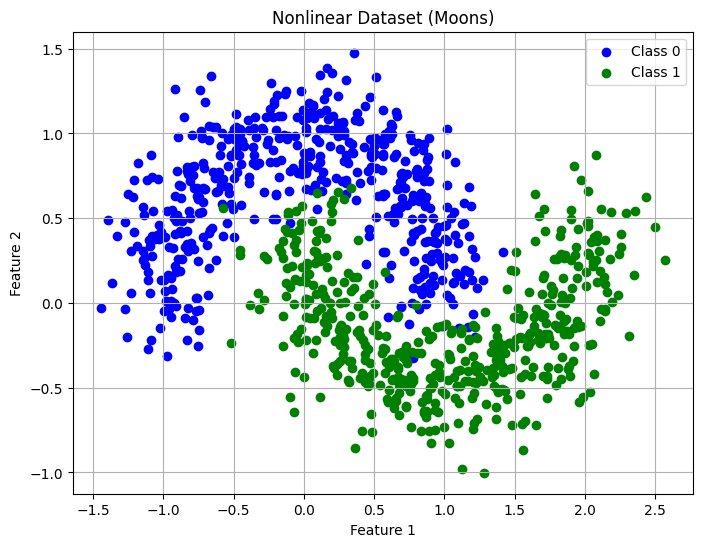

In [26]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
# Generate nonlinear dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
print("First 10 data points:")
print(X[:10])
print("Labels of the first 10 data points:")
print(y[:10])
# Plot the nonlinear dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='green', label='Class 1')
plt.title('Nonlinear Dataset (Moons)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

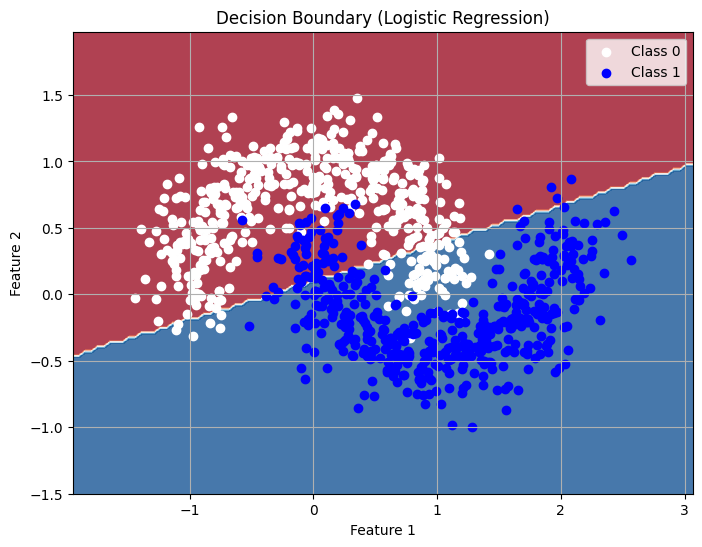

In [27]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
# Generate nonlinear dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
# Fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)
# Define meshgrid to plot decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the decision boundary and dataset
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='white', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
plt.title('Decision Boundary (Logistic Regression)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit logistic regression model on the training set
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# Predict the classes on the testing set
y_pred = log_reg.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.86


5342/5342 [==============================] - 8s 2ms/step


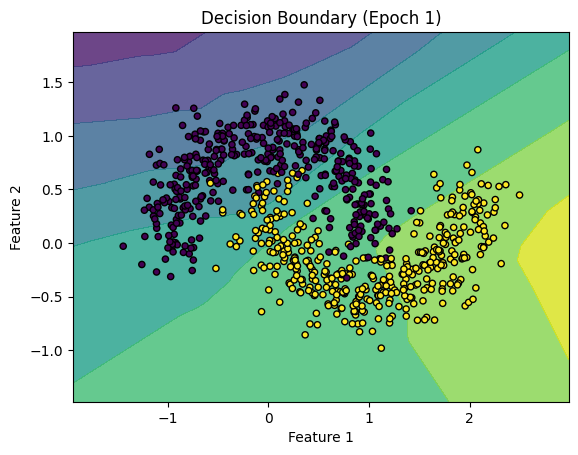

5342/5342 [==============================] - 9s 2ms/step


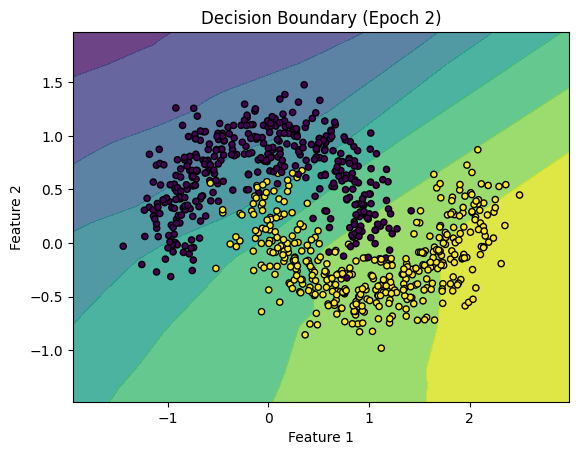

5342/5342 [==============================] - 9s 2ms/step


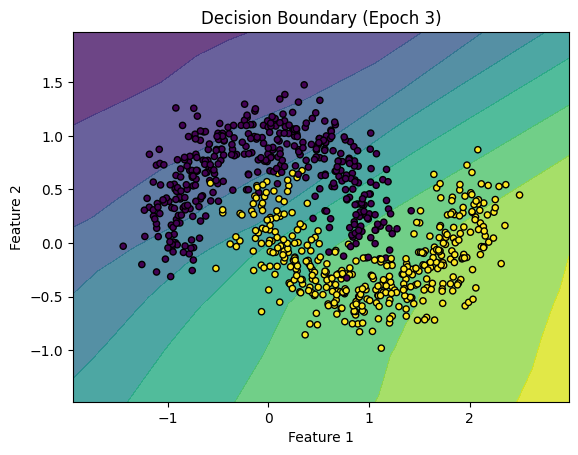

5342/5342 [==============================] - 8s 1ms/step


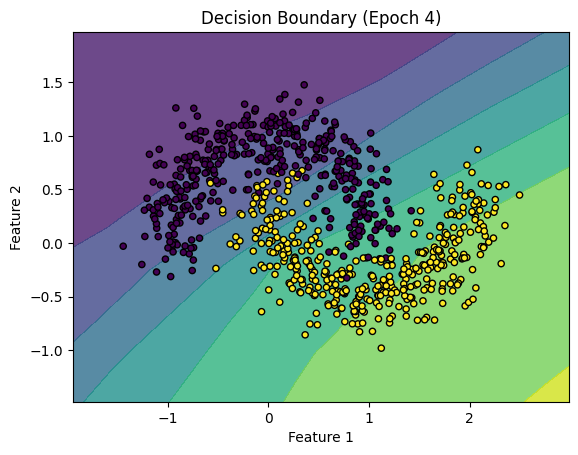

5342/5342 [==============================] - 8s 2ms/step


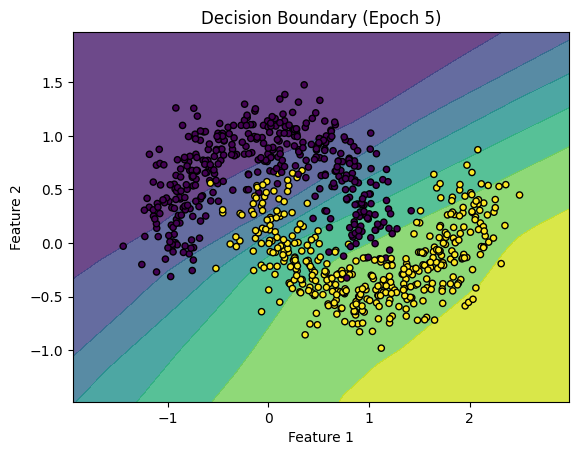

5342/5342 [==============================] - 10s 2ms/step


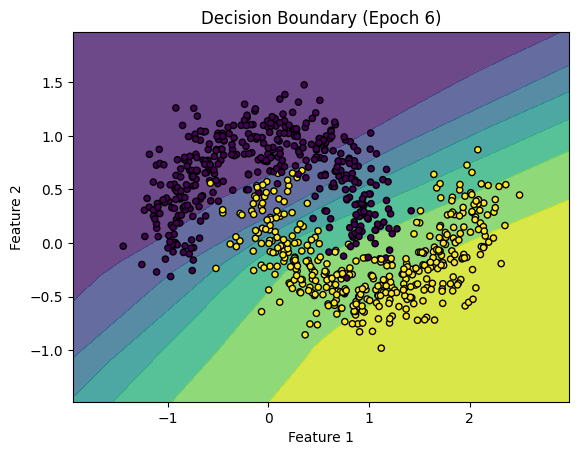

5342/5342 [==============================] - 11s 2ms/step


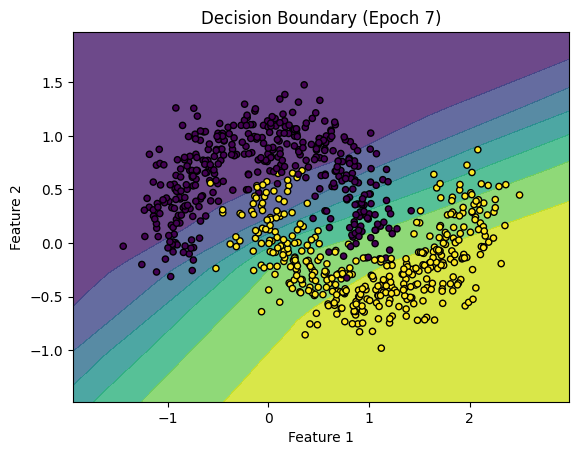

5342/5342 [==============================] - 11s 2ms/step


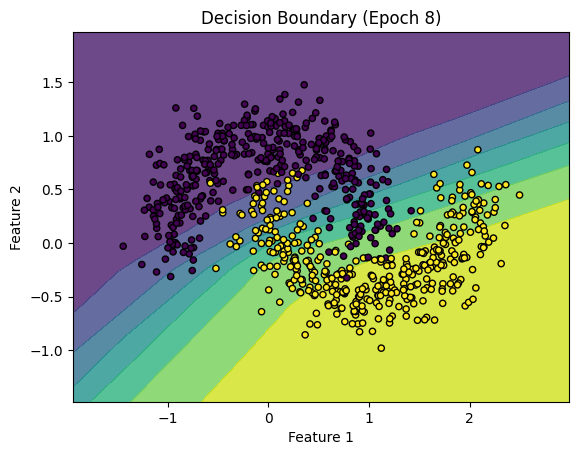

5342/5342 [==============================] - 10s 2ms/step


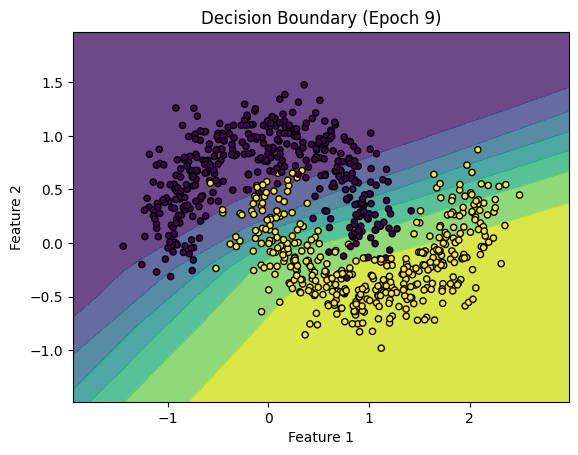

5342/5342 [==============================] - 9s 2ms/step


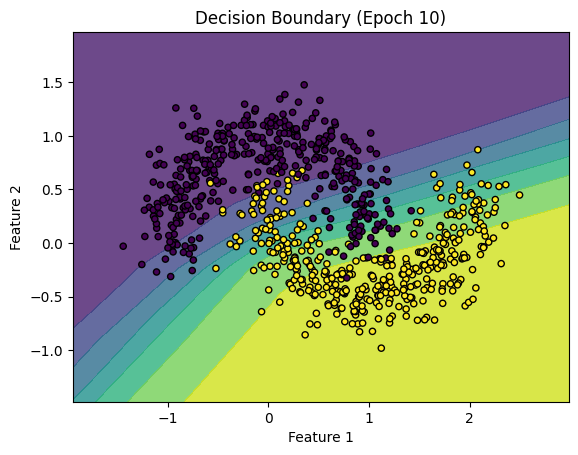

5342/5342 [==============================] - 13s 2ms/step


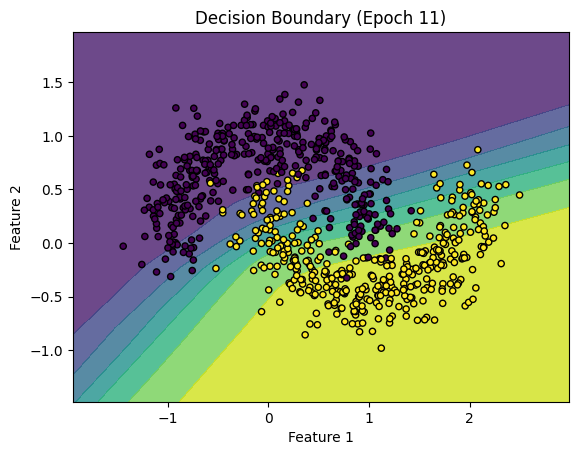

5342/5342 [==============================] - 10s 2ms/step


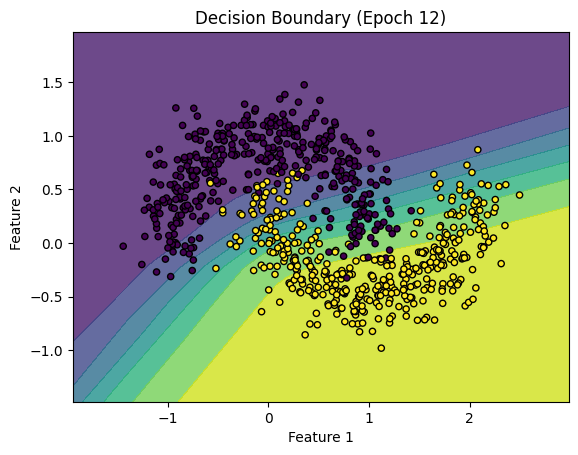

5342/5342 [==============================] - 9s 2ms/step


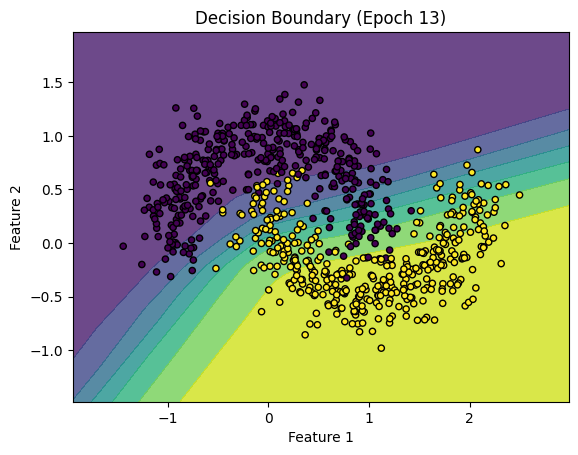

5342/5342 [==============================] - 11s 2ms/step


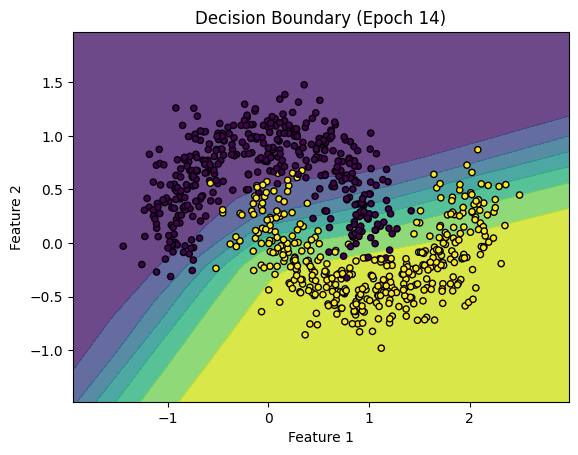

5342/5342 [==============================] - 9s 2ms/step


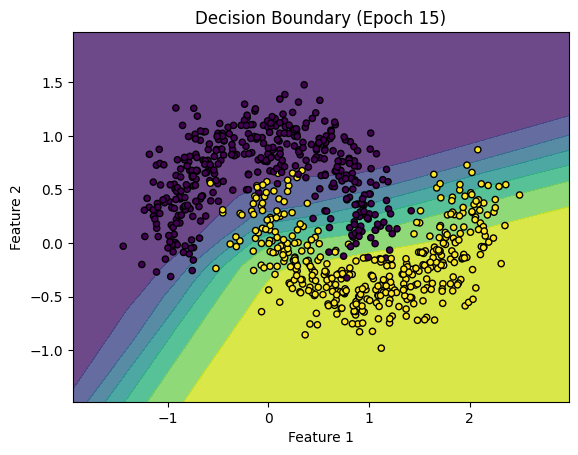

5342/5342 [==============================] - 13s 2ms/step


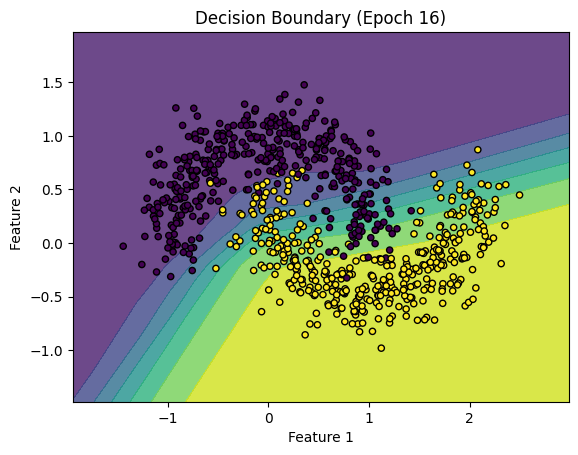

5342/5342 [==============================] - 10s 2ms/step


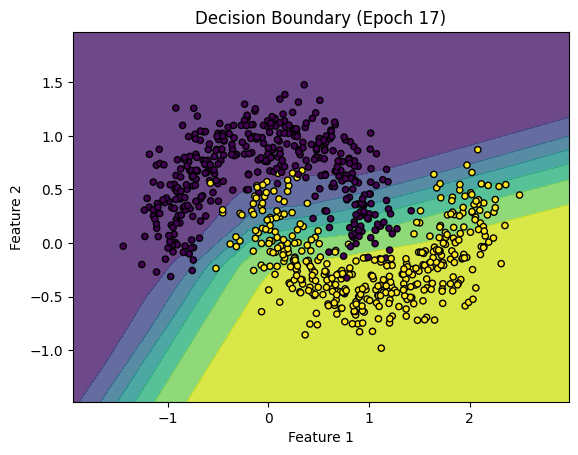

5342/5342 [==============================] - 11s 2ms/step


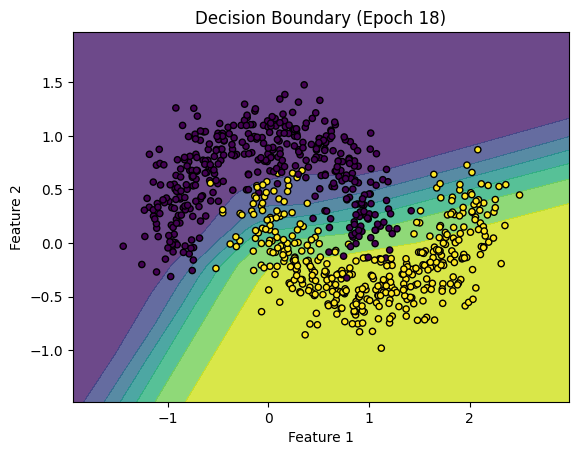

5342/5342 [==============================] - 11s 2ms/step


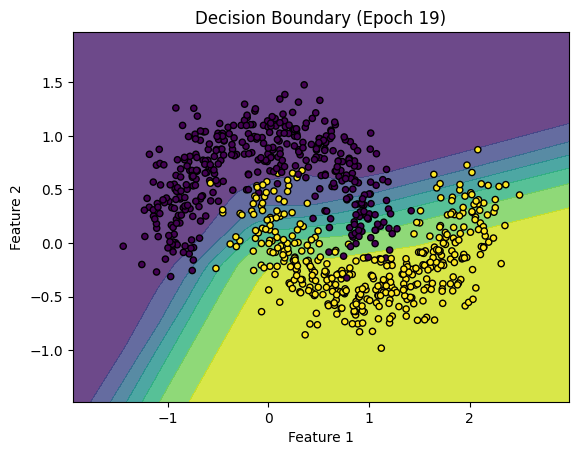

5342/5342 [==============================] - 11s 2ms/step


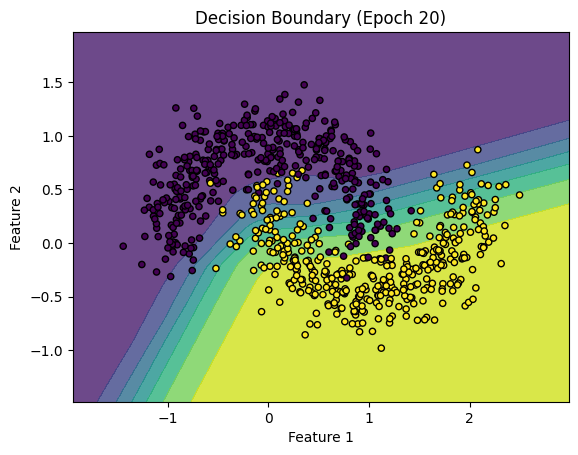

5342/5342 [==============================] - 11s 2ms/step


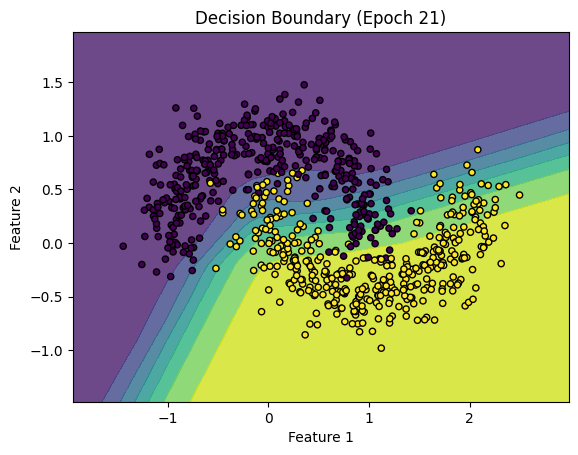

5342/5342 [==============================] - 11s 2ms/step


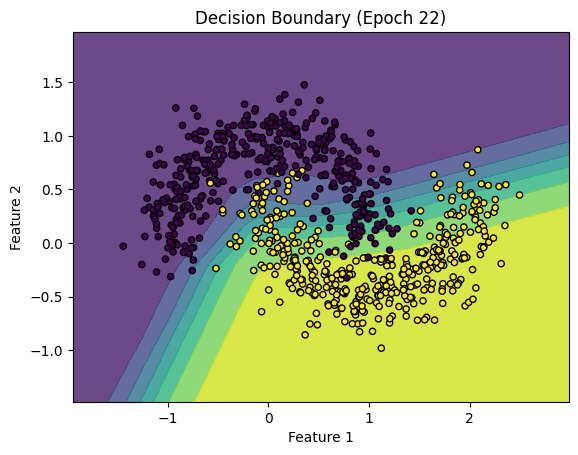

5342/5342 [==============================] - 10s 2ms/step


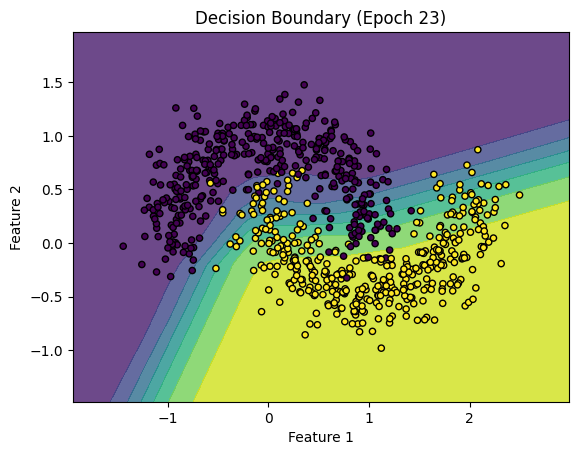

5342/5342 [==============================] - 12s 2ms/step


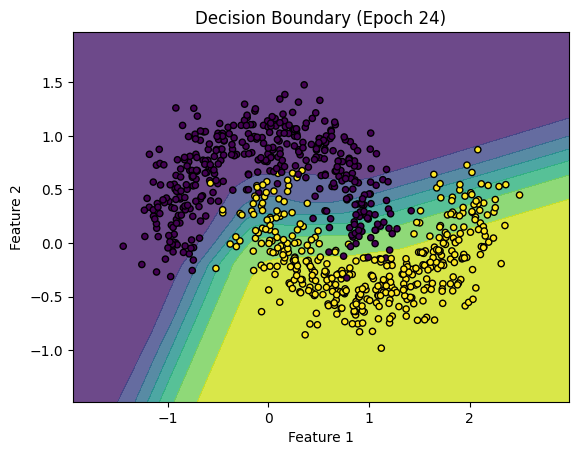

5342/5342 [==============================] - 11s 2ms/step


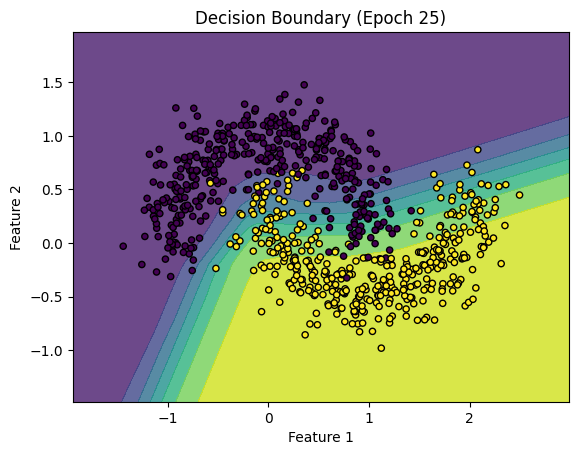

5342/5342 [==============================] - 11s 2ms/step


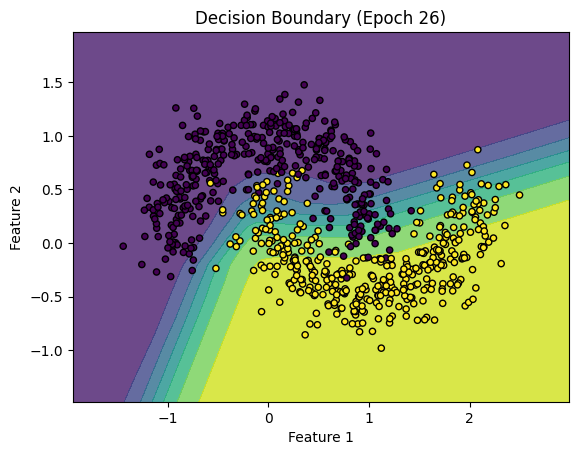

5342/5342 [==============================] - 11s 2ms/step


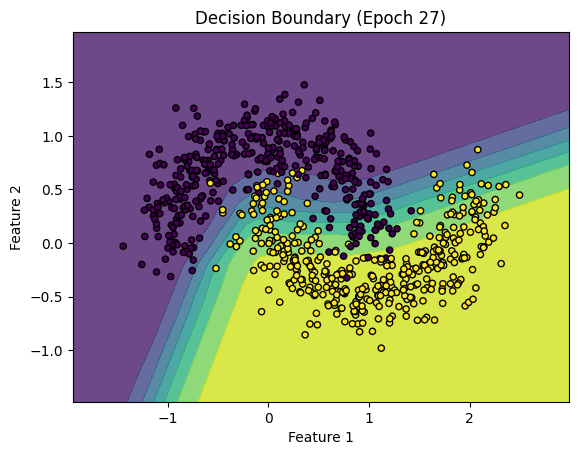

5342/5342 [==============================] - 11s 2ms/step


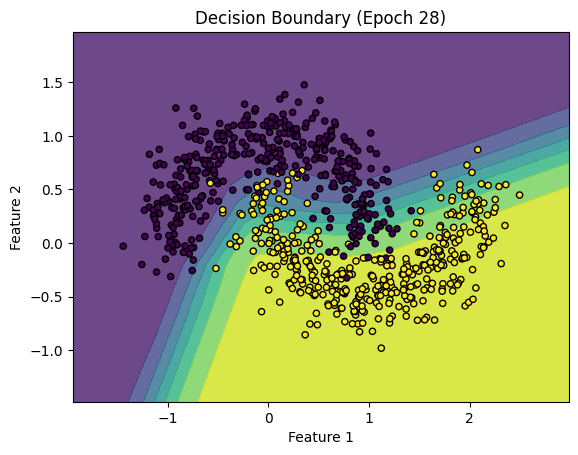

5342/5342 [==============================] - 11s 2ms/step


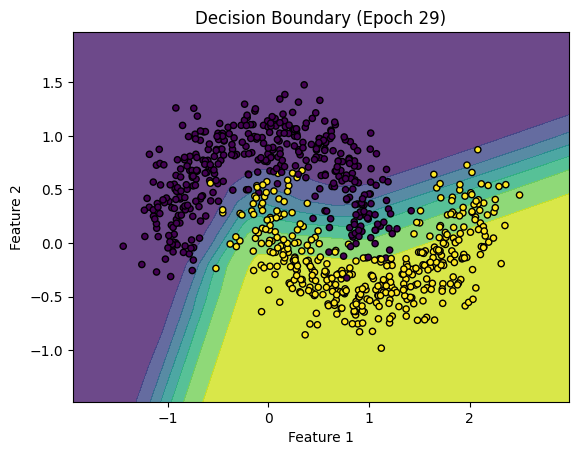

5342/5342 [==============================] - 11s 2ms/step


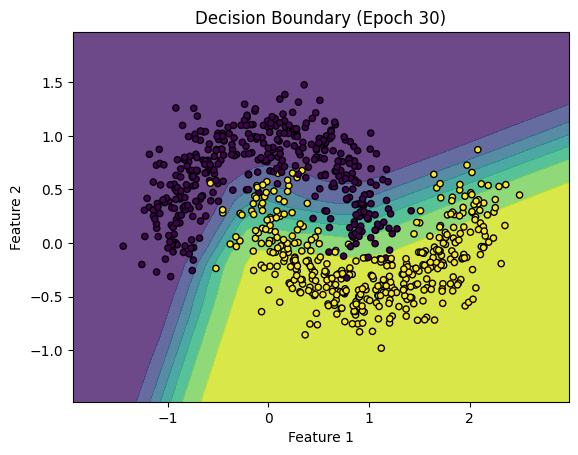

5342/5342 [==============================] - 11s 2ms/step


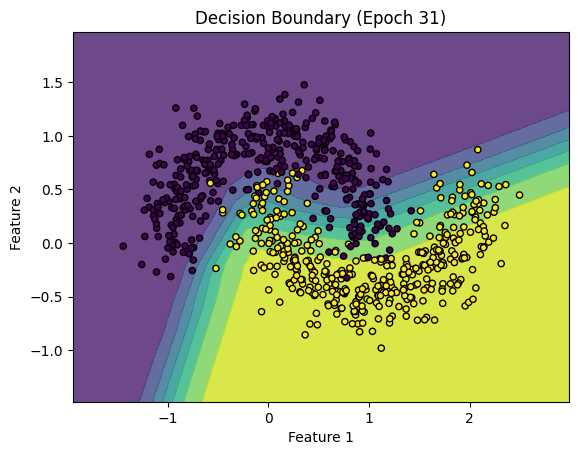

5342/5342 [==============================] - 11s 2ms/step


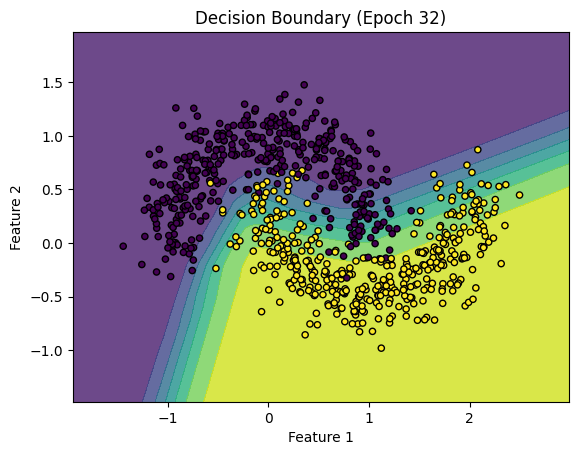

5342/5342 [==============================] - 12s 2ms/step


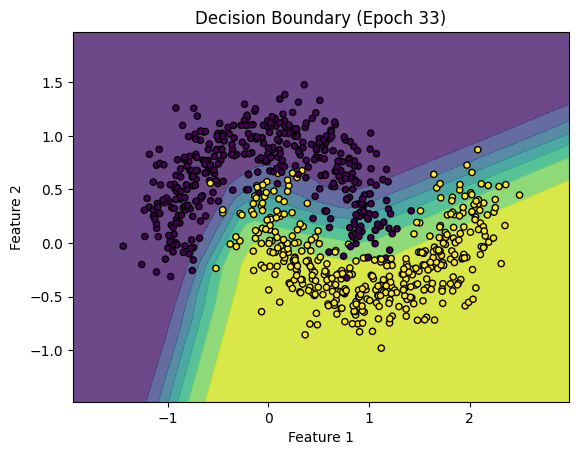

5342/5342 [==============================] - 10s 2ms/step


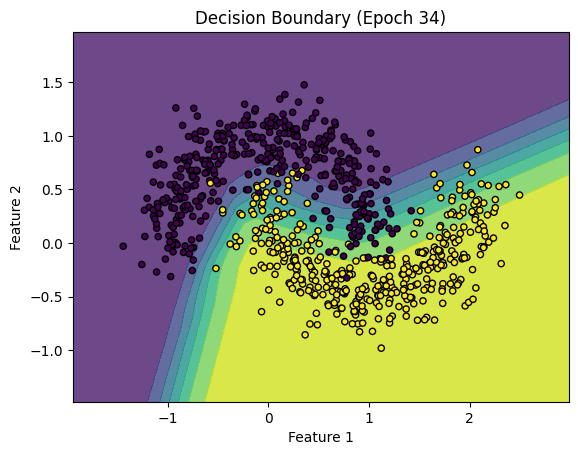

5342/5342 [==============================] - 11s 2ms/step


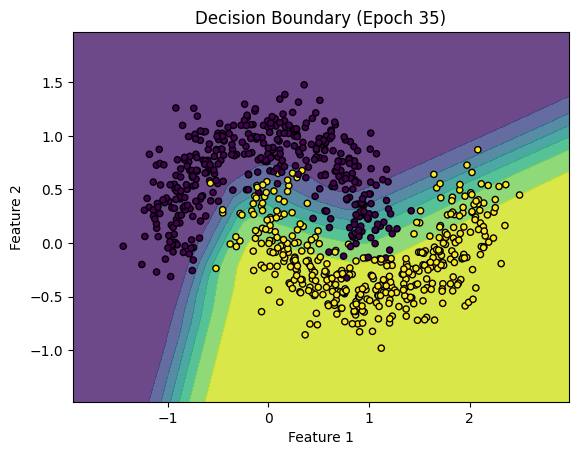

5342/5342 [==============================] - 11s 2ms/step


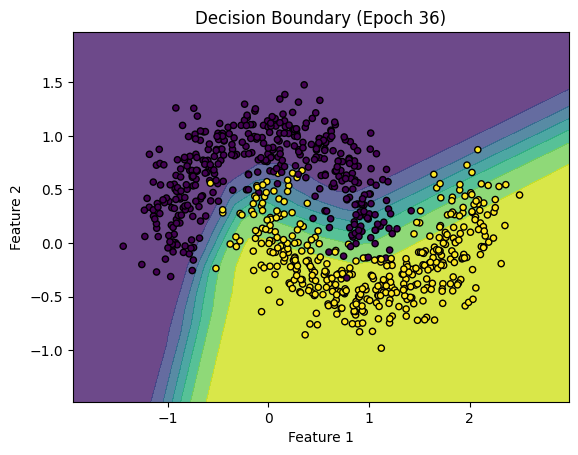

5342/5342 [==============================] - 11s 2ms/step


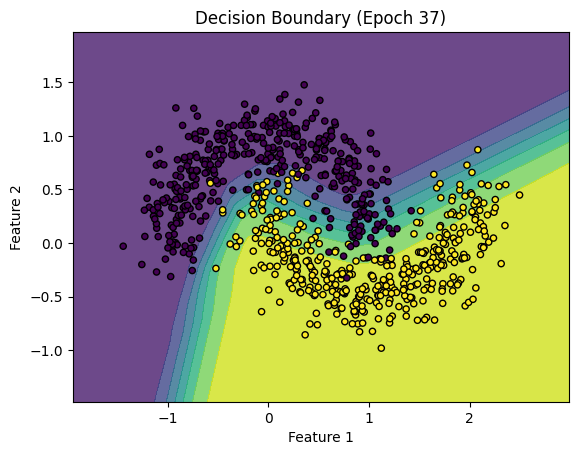

5342/5342 [==============================] - 11s 2ms/step


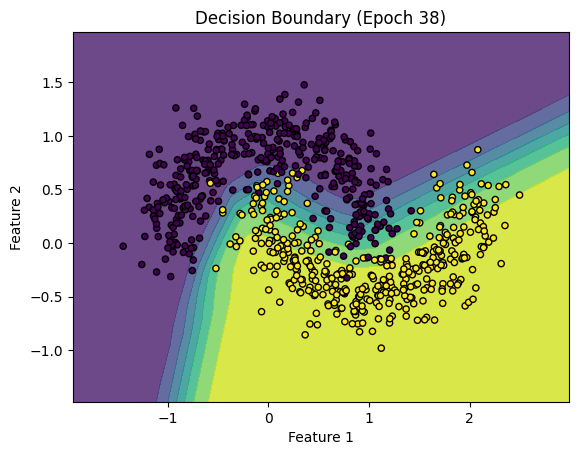

5342/5342 [==============================] - 11s 2ms/step


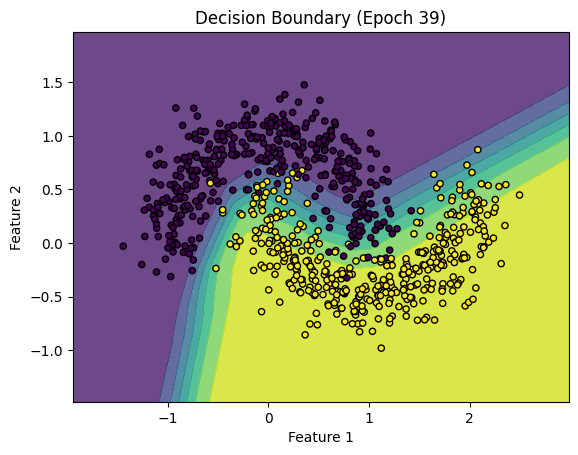

5342/5342 [==============================] - 11s 2ms/step


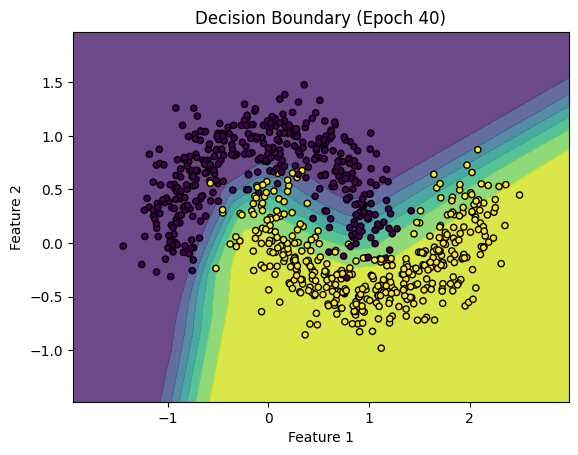

5342/5342 [==============================] - 12s 2ms/step


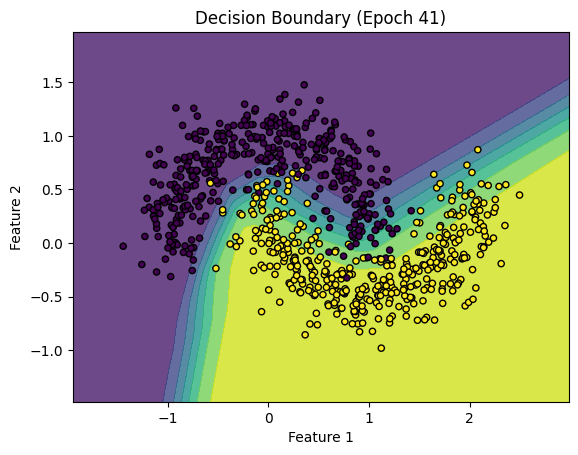

5342/5342 [==============================] - 10s 2ms/step


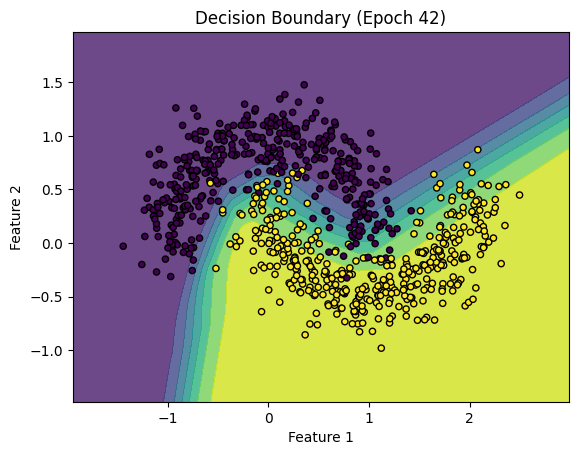

5342/5342 [==============================] - 11s 2ms/step


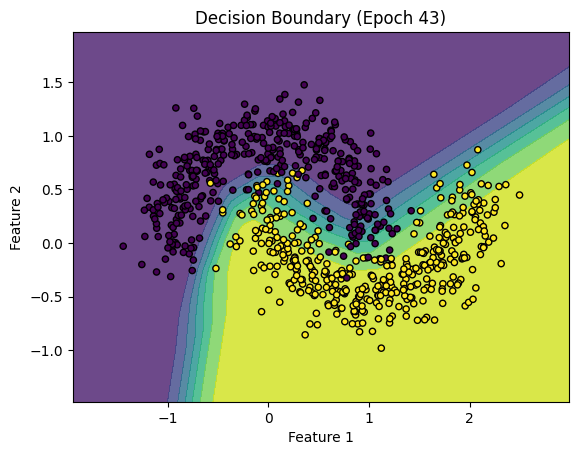

5342/5342 [==============================] - 11s 2ms/step


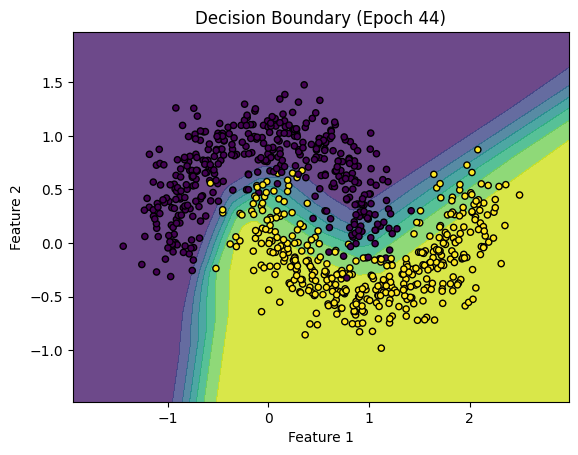

5342/5342 [==============================] - 12s 2ms/step


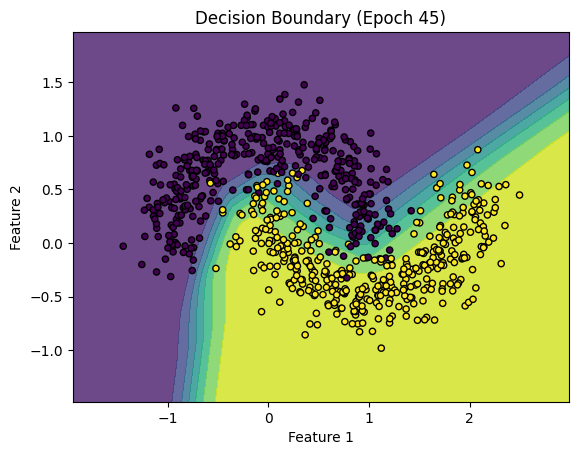

5342/5342 [==============================] - 11s 2ms/step


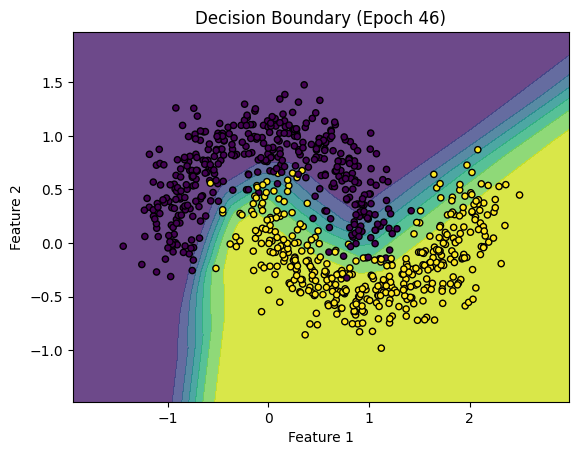

5342/5342 [==============================] - 11s 2ms/step


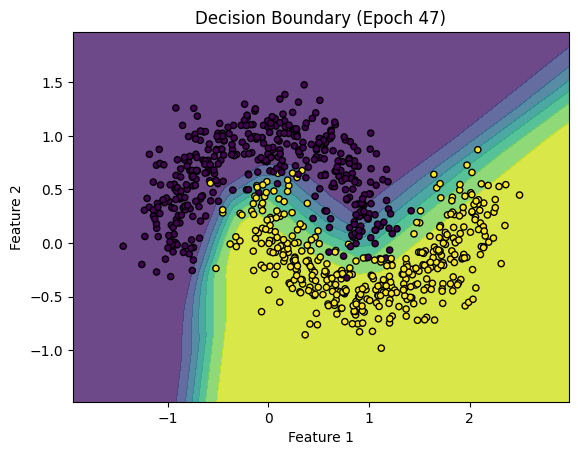

5342/5342 [==============================] - 11s 2ms/step


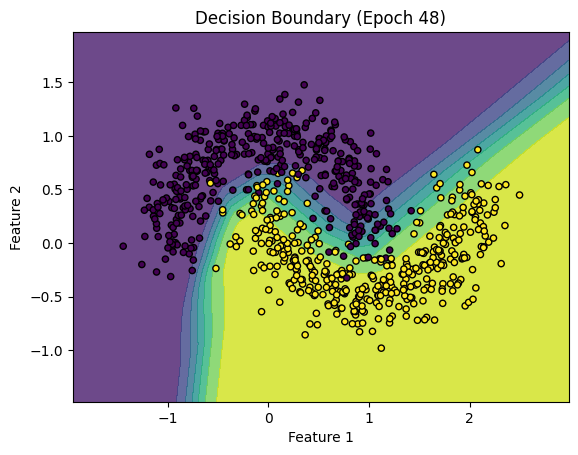

5342/5342 [==============================] - 11s 2ms/step


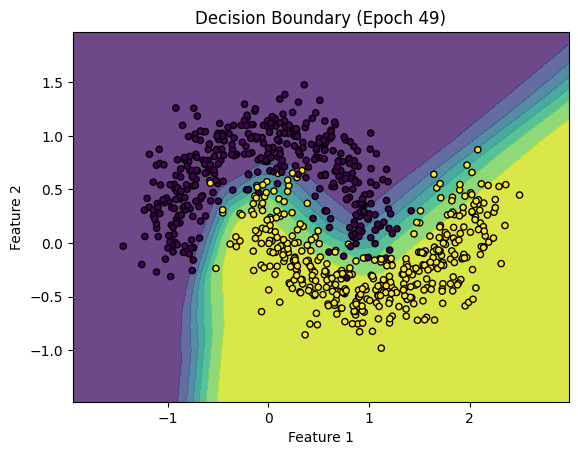

5342/5342 [==============================] - 11s 2ms/step


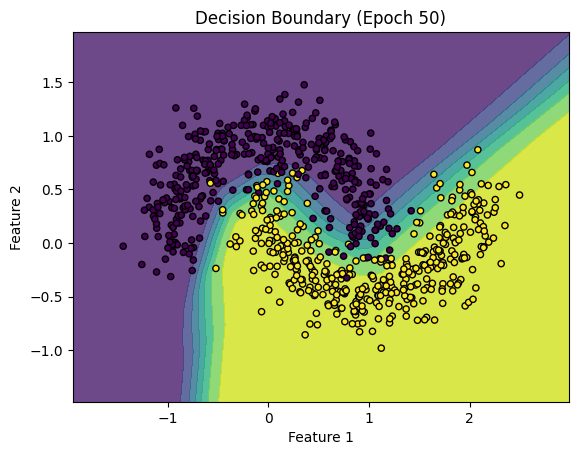

7/7 [==============================] - 0s 4ms/step - loss: 0.1042 - accuracy: 0.9600
Test accuracy: 0.9599999785423279


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
# Generate nonlinear dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define neural network model
model = keras.Sequential([ keras.layers.Dense(32, activation='relu', input_shape=(2,)), keras.layers.Dense(16, activation='relu'), keras.layers.Dense(1, activation='sigmoid') ])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Function to plot decision boundary
def plot_decision_boundary(X, y, model, epoch):
  plt.figure()
  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title(f'Decision Boundary (Epoch {epoch})')
  plt.show()
# Train the model
for epoch in range(1, 51):
  history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.1, verbose=0)
  plot_decision_boundary(X_train, y_train, model, epoch)
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

In [31]:
# Evaluate the model test_loss,
test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

7/7 [==============================] - 0s 5ms/step - loss: 0.1042 - accuracy: 0.9600
Test accuracy: [0.10418196022510529, 0.9599999785423279]


In [33]:
total_params = 0
for layer in model.layers:
# Get weights and biases for the layer
  weights, biases = layer.get_weights()
  # Count parameters in the layer
  layer_params = weights.size + biases.size
  total_params += layer_params
print("Total number of parameters in the model:", total_params)

Total number of parameters in the model: 641


##***7. Using Convolution Neural Network technique to make MNIST Standard architecture.***

(1797, 64)


<Figure size 640x480 with 0 Axes>

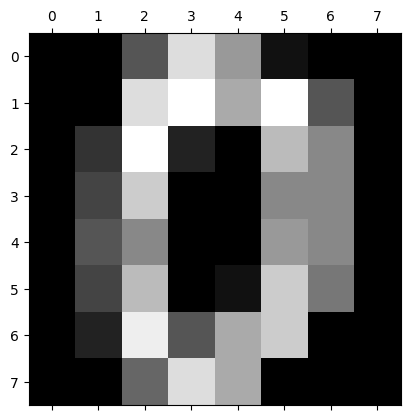

In [34]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [35]:
from sklearn.datasets import load_digits
# Load the digits dataset
digits = load_digits()
# Print the shape of the data
print("Shape of the dataset:", digits.data.shape)
# Print the number of samples
print("Number of samples:", len(digits.target))
# Print the number of classes
print("Number of classes:", len(set(digits.target)))
# Print a description of the dataset
print("\nDescription:")
print(digits.DESCR)

Shape of the dataset: (1797, 64)
Number of samples: 1797
Number of classes: 10

Description:
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are 

Shape of the dataset: (1797, 64)
Number of samples: 1797
Number of classes: 10

Description:
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are 

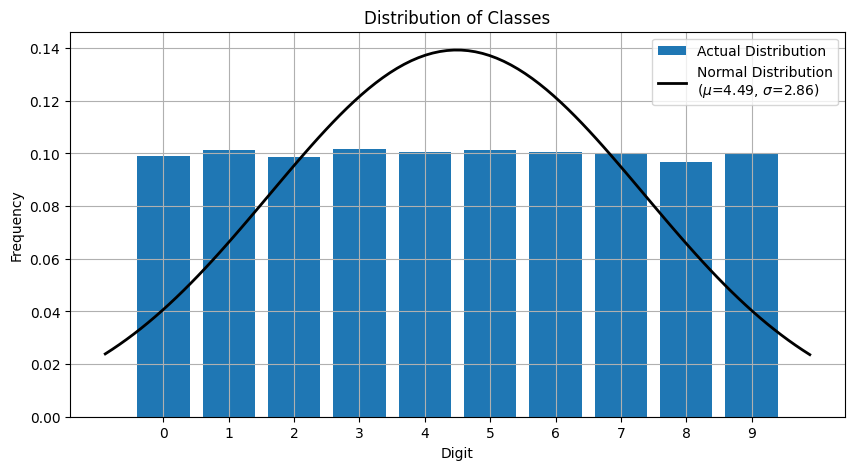

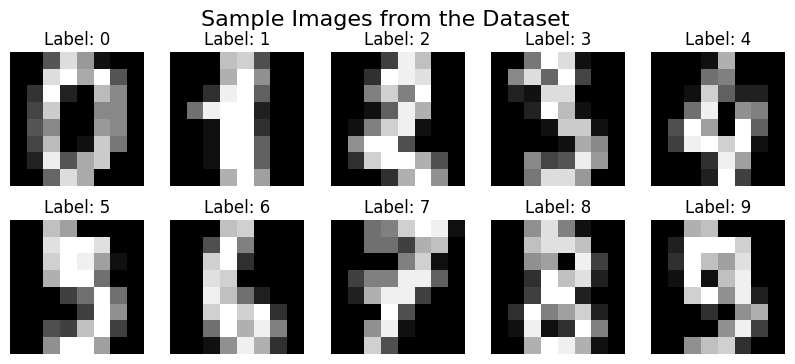

In [36]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# Load the digits dataset
digits = load_digits()
# Print the shape of the data
print("Shape of the dataset:", digits.data.shape)
# Print the number of samples
print("Number of samples:", len(digits.target))
# Print the number of classes
print("Number of classes:", len(np.unique(digits.target)))
# Print a description of the dataset
print("\nDescription:")
print(digits.DESCR)
# Plot the distribution of classes
plt.figure(figsize=(10, 5))
plt.hist(digits.target, bins=range(11), align='left', rwidth=0.8, density=True, label='Actual Distribution')
plt.xticks(range(10))
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.title('Distribution of Classes')
plt.grid(True)
# Fit a normal distribution to the class distribution
mu, std = norm.fit(digits.target)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label=f'Normal Distribution\n($\mu$={mu:.2f}, $\sigma$={std:.2f})')
plt.legend()
plt.show()
# Plot a few sample images
plt.figure(figsize=(10, 4))
for i in range(10):
   plt.subplot(2, 5, i + 1)
   plt.imshow(digits.images[i], cmap='gray')
   plt.title("Label: %d" % digits.target[i])
   plt.axis('off')
plt.suptitle("Sample Images from the Dataset", fontsize=16)
plt.show()

Epoch 1/20
36/36 [==============================] - 1s 7ms/step - loss: 1.9872 - accuracy: 0.4865 - val_loss: 1.6093 - val_accuracy: 0.7049
Epoch 2/20
36/36 [==============================] - 0s 3ms/step - loss: 1.3248 - accuracy: 0.8207 - val_loss: 1.0326 - val_accuracy: 0.8750
Epoch 3/20
36/36 [==============================] - 0s 3ms/step - loss: 0.8487 - accuracy: 0.8886 - val_loss: 0.6731 - val_accuracy: 0.8889
Epoch 4/20
36/36 [==============================] - 0s 3ms/step - loss: 0.5779 - accuracy: 0.9182 - val_loss: 0.5093 - val_accuracy: 0.8958
Epoch 5/20
36/36 [==============================] - 0s 3ms/step - loss: 0.4369 - accuracy: 0.9295 - val_loss: 0.4144 - val_accuracy: 0.9062
Epoch 6/20
36/36 [==============================] - 0s 3ms/step - loss: 0.3520 - accuracy: 0.9426 - val_loss: 0.3574 - val_accuracy: 0.9201
Epoch 7/20
36/36 [==============================] - 0s 3ms/step - loss: 0.2953 - accuracy: 0.9539 - val_loss: 0.3183 - val_accuracy: 0.9271
Epoch 8/20
36/36 [==

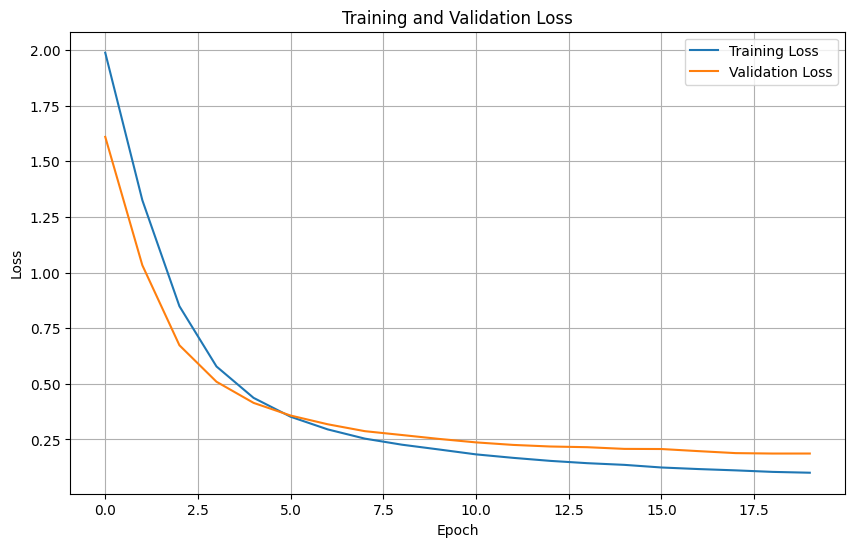

In [37]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# Load the digits dataset
digits = load_digits()
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
digits_scaled = scaler.fit_transform(digits.data)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits_scaled, digits.target, test_size=0.2, random_state=42)
# Build the neural network model
model = tf.keras.Sequential([ tf.keras.layers.Dense(128, activation='relu', input_shape=(64,)), tf.keras.layers.Dense(10, activation='softmax') ])
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("\nTest Accuracy:", test_accuracy)
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
# Load the digits dataset digits = load_digits()
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
digits_scaled = scaler.fit_transform(digits.data)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits_scaled, digits.target, test_size=0.2, random_state=42)
# Build the neural network model
model = tf.keras.Sequential([ tf.keras.layers.Dense(128, activation='relu', input_shape=(64,), name='hidden_layer'), tf.keras.layers.Dense(10, activation='softmax', name='output_layer') ])
# Count the number of parameters
total_parameters = np.sum([layer.count_params() for layer in model.layers])
print("Total Parameters in the Model:", total_parameters)

Total Parameters in the Model: 9610


In [39]:
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Load the digits dataset
digits = load_digits()
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
digits_scaled = scaler.fit_transform(digits.data)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits_scaled, digits.target, test_size=0.2, random_state=42)
# Build the neural network model with dropout
model = tf.keras.Sequential([ tf.keras.layers.Dense(128, activation='relu', input_shape=(64,), name='hidden_layer'), tf.keras.layers.Dropout(0.2),
# Add a dropout layer with a dropout rate of 0.2
tf.keras.layers.Dense(10, activation='softmax', name='output_layer') ])
# Access the dropout layer
dropout_layer = model.layers[1]
# Get the dropout rate
dropout_rate = dropout_layer.rate
print("Dropout Rate:", dropout_rate)

Dropout Rate: 0.2


##***8. Implementation of Simple Convolution Neural Network Architecture on an image.(Dataset)***

In [44]:
import numpy as np
# Define the 6x6 image
image = np.random.rand(6, 6)
print(image)
print()
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
print(kernel)
def convolve(image, kernel):
  img_height, img_width = image.shape
  kernel_height, kernel_width = kernel.shape
  output_height = img_height - kernel_height + 1
  output_width = img_width - kernel_width + 1
  output = np.zeros((output_height, output_width))
  for i in range(output_height):
    for j in range(output_width):
      output[i, j] = np.sum(image[i:i+kernel_height, j:j+kernel_width] * kernel)
  return output
convolved_output = convolve(image, kernel)
print()
print("Convolved Output:")
print(convolved_output)
def convolve(image, kernel, padding=0, stride=1):
  img_height, img_width = image.shape
  kernel_height, kernel_width = kernel.shape
  # Calculate the dimensions of the output array
  output_height = ((img_height + 2 * padding - kernel_height) //stride) + 1
  output_width = ((img_width + 2 * padding - kernel_width) // stride )+ 1
  print(output_width,output_height)
  # Add padding to the image
  padded_image = np.pad(image, padding, mode='constant')
  # Initialize the output array
  output = np.zeros((output_height, output_width))
  for i in range(0, img_height + padding * 2 - kernel_height + 1, stride):
    for j in range(0, img_width + padding * 2 - kernel_width + 1, stride):
      output[i // stride, j // stride] = np.sum( padded_image[i:i + kernel_height, j:j + kernel_width] * kernel )
      return output
convolved_output = convolve(image, kernel,padding=1,stride=1)
print()
print("Convolved Output:")
print(convolved_output)

[[0.3593299  0.03929228 0.20648584 0.67357868 0.81397988 0.43873893]
 [0.60008136 0.16628496 0.24607818 0.66713537 0.82400451 0.45098546]
 [0.58944575 0.04865805 0.10948693 0.38156455 0.70809196 0.45141213]
 [0.40501742 0.5818081  0.65548961 0.68240451 0.0501427  0.34925204]
 [0.92317594 0.72349379 0.21823931 0.51567312 0.81899874 0.07288751]
 [0.00274858 0.19910291 0.28891978 0.67110931 0.04912172 0.47677393]]

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]

Convolved Output:
[[ 0.98680605 -1.46804331 -1.78402539  0.38114207]
 [ 0.58348981 -0.93435331 -0.57118445  0.47945479]
 [ 0.93442325 -0.22568223 -0.59401754  0.7060905 ]
 [ 0.16829323 -0.36478213  0.24438555  0.97027346]]
6 6

Convolved Output:
[[-0.20557724  0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]


In [48]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# Load the image
image = cv2.imread('/content/pexels-photo-757889.jpeg', cv2.IMREAD_GRAYSCALE)
# Define the kernel
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
# Define the convolution function
def convolve(image, kernel, padding=0, stride=1):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    # Calculate the dimensions of the output array
    output_height = ((img_height + 2 * padding - kernel_height) // stride) + 1
    output_width = ((img_width + 2 * padding - kernel_width) // stride )+ 1
    # Add padding to the image
    padded_image = np.pad(image, padding, mode='constant')
    # Initialize the output array
    output = np.zeros((output_height, output_width))
    for i in range(0, img_height + padding * 2 - kernel_height + 1, stride):
      for j in range(0, img_width + padding * 2 - kernel_width + 1, stride):
        output[i // stride, j // stride] = np.sum( padded_image[i:i + kernel_height, j:j + kernel_width] * kernel )
    return output
# Perform convolution
convolved_output = convolve(image, kernel, padding=1, stride=1)
# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
# Display the convolved output
plt.subplot(1, 2, 2)
plt.imshow(convolved_output, cmap='gray')
plt.title('Convolved Output')
plt.axis('off')
plt.tight_layout()
plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

##***9. Implementation of a Transfer Learning concept in Image Classification.***

In [50]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model = models.Sequential([ layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)), layers.MaxPooling2D((2, 2)), layers.Conv2D(16, (5, 5), activation='relu'), layers.MaxPooling2D((2, 2)), layers.Flatten(), layers.Dense(120, activation='relu'), layers.Dense(84, activation='relu'), layers.Dense(10, activation='softmax') ])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)
# Evaluate the model test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
750/750 [==============================] - 23s 29ms/step - loss: 0.2815 - accuracy: 0.9153 - val_loss: 0.0930 - val_accuracy: 0.9708
Epoch 2/5
750/750 [==============================] - 23s 30ms/step - loss: 0.0800 - accuracy: 0.9757 - val_loss: 0.0798 - val_accuracy: 0.9765
Epoch 3/5
750/750 [==============================] - 21s 28ms/step - loss: 0.0572 - accuracy: 0.9821 - val_loss: 0.0568 - val_accuracy: 0.9829
Epoch 4/5
750/750 [==============================] - 23s 30ms/step - loss: 0.0432 - accuracy: 0.9866 - val_loss: 0.0480 - val_accuracy: 0.9861
Epoch 5/5
750/750 [==============================] - 21s 28ms/step - loss: 0.0342 - accuracy: 0.9892 - val_loss: 0.0581 - val_accuracy: 0.9838
Test accuracy: [0.10418196022510529, 0.9599999785423279]


##***10. Implementation of AlexNet Architecture.***

In [51]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
# Define the AlexNet architecture
model = models.Sequential()
model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # Output layer for 10 classes
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
469/469 [==============================] - 1317s 3s/step - loss: 0.8165 - accuracy: 0.6949 - val_loss: 0.1492 - val_accuracy: 0.9592
Epoch 2/10
 82/469 [====>.........................] - ETA: 18:13 - loss: 0.1338 - accuracy: 0.9638

KeyboardInterrupt: 

##***11. Implementation of an Opinion Mining in Recurrent Neural network.***

17464789/17464789 [==============================] - 0s 0us/step
Shape of x_train: (25000,)
Shape of y_train: (25000,)
Shape of x_test: (25000,)
Shape of y_test: (25000,)
Class Distribution: {0: 25000, 1: 25000}
Average Length of Reviews: 234.75892
Minimum Length of Reviews: 7
Maximum Length of Reviews: 2494


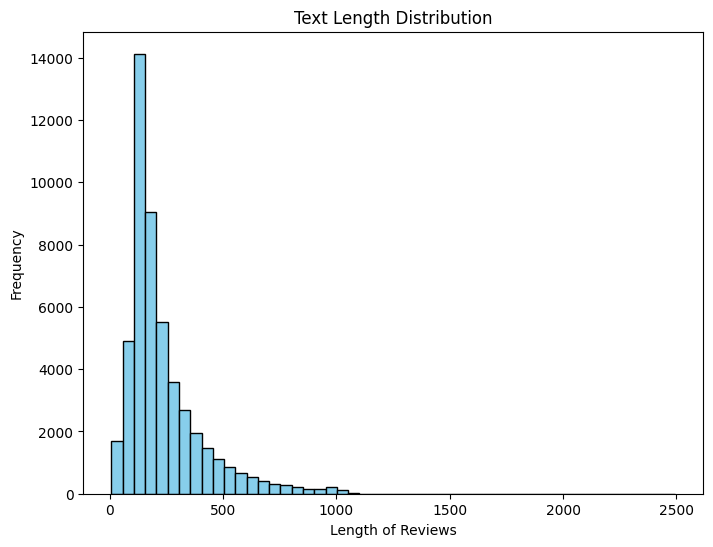

Top 20 Most Common Words:
4: 666757
Number of Positive Reviews: 25000
Number of Negative Reviews: 25000
2: 638669
Number of Positive Reviews: 25000
Number of Negative Reviews: 25000
5: 324337
Number of Positive Reviews: 25000
Number of Negative Reviews: 25000
6: 322800
Number of Positive Reviews: 25000
Number of Negative Reviews: 25000
7: 289379
Number of Positive Reviews: 25000
Number of Negative Reviews: 25000
8: 268079
Number of Positive Reviews: 25000
Number of Negative Reviews: 25000
9: 211041
Number of Positive Reviews: 25000
Number of Negative Reviews: 25000
10: 201951
Number of Positive Reviews: 25000
Number of Negative Reviews: 25000
11: 186690
Number of Positive Reviews: 25000
Number of Negative Reviews: 25000
12: 156801
Number of Positive Reviews: 25000
Number of Negative Reviews: 25000
13: 154887
Number of Positive Reviews: 25000
Number of Negative Reviews: 25000
14: 150941
Number of Positive Reviews: 25000
Number of Negative Reviews: 25000
15: 136986
Number of Positive Rev

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
# Load the IMDB dataset
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
# Combine train and test sets for analysis
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
# Dataset Overview
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)
# Class Distribution
unique, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution:", class_distribution)
# Text Length Distribution
review_lengths = [len(review) for review in x]
print("Average Length of Reviews:", np.mean(review_lengths))
print("Minimum Length of Reviews:", np.min(review_lengths))
print("Maximum Length of Reviews:", np.max(review_lengths))
plt.figure(figsize=(8, 6))
plt.hist(review_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Length of Reviews')
plt.ylabel('Frequency')
plt.show()
# Word Frequency Analysis
word_counts = {}
for review in x:
  for word in review:
    if word not in word_counts:
      word_counts[word] = 1
    else:
      word_counts[word] += 1
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
top_words = sorted_word_counts[:20]
print("Top 20 Most Common Words:")
for word, count in top_words:
  print(f"{word}: {count}")
  # Sentiment Analysis
  positive_reviews = x[y == 1]
  negative_reviews = x[y == 0]
  print("Number of Positive Reviews:", len(positive_reviews))
  print("Number of Negative Reviews:", len(negative_reviews))

In [55]:
# Implementation using RNN
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
# Load the IMDB dataset
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
# Pad sequences to ensure uniform length
max_length = 200
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)
# Define RNN model
embedding_dim = 16
model = Sequential([ Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length), SimpleRNN(units=64), Dense(units=1, activation='sigmoid') ])
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/5
313/313 [==============================] - 23s 68ms/step - loss: 0.6603 - accuracy: 0.5835 - val_loss: 0.5926 - val_accuracy: 0.7006
Epoch 2/5
313/313 [==============================] - 21s 67ms/step - loss: 0.5266 - accuracy: 0.7332 - val_loss: 0.4407 - val_accuracy: 0.7890
Epoch 3/5
313/313 [==============================] - 19s 62ms/step - loss: 0.3264 - accuracy: 0.8635 - val_loss: 0.4106 - val_accuracy: 0.8198
Epoch 4/5
313/313 [==============================] - 22s 71ms/step - loss: 0.2790 - accuracy: 0.8887 - val_loss: 0.3840 - val_accuracy: 0.8360
Epoch 5/5
782/782 [==============================] - 10s 13ms/step - loss: 0.4120 - accuracy: 0.8326
Test Loss: 0.4120255410671234, Test Accuracy: 0.8326399922370911


##***12. Implementation of a Simple LSTM using TensorFlow/Keras.***

Shape of x_train: (25000,)
Shape of y_train: (25000,)
Shape of x_test: (25000,)
Shape of y_test: (25000,)
Class Distribution: {0: 25000, 1: 25000}
Average Length of Reviews: 234.75892
Minimum Length of Reviews: 7
Maximum Length of Reviews: 2494


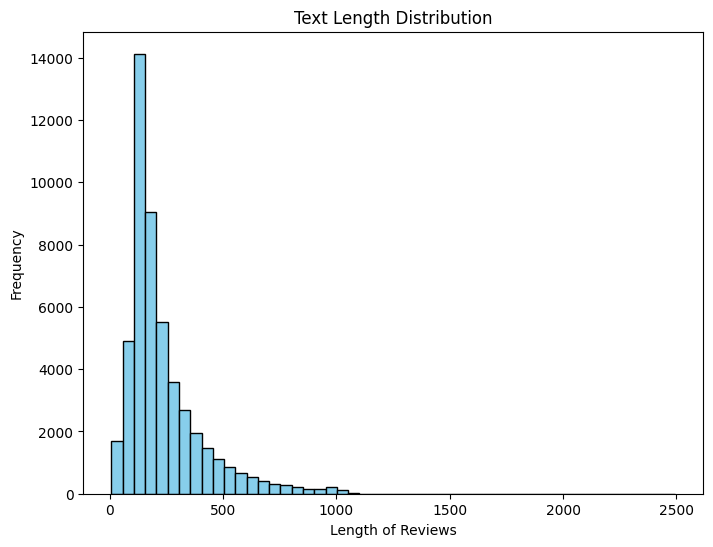

KeyboardInterrupt: 

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
# Load the IMDB dataset
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
# Combine train and test sets for analysis
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
# Dataset Overview
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)
# Class Distribution
unique, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution:", class_distribution)
# Text Length Distribution
review_lengths = [len(review) for review in x]
print("Average Length of Reviews:", np.mean(review_lengths))
print("Minimum Length of Reviews:", np.min(review_lengths))
print("Maximum Length of Reviews:", np.max(review_lengths))
plt.figure(figsize=(8, 6))
plt.hist(review_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Length of Reviews')
plt.ylabel('Frequency')
plt.show()
# Word Frequency Analysis
word_counts = {}
for review in x:
  for word in review:
    if word not in word_counts:
      word_counts[word] = 1
    else:
      word_counts[word] += 1
      sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
      top_words = sorted_word_counts[:20]
print("Top 20 Most Common Words:")
for word, count in top_words:
  print(f"{word}: {count}")
  # Sentiment Analysis
  positive_reviews = x[y == 1]
  negative_reviews = x[y == 0]
  print("Number of Positive Reviews:", len(positive_reviews))
  print("Number of Negative Reviews:", len(negative_reviews))

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
# Load the IMDB dataset
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
# Pad sequences to ensure uniform length
max_length = 200
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)
# Define LSTM model
embedding_dim = 16
model = Sequential([ Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length), LSTM(units=64), Dense(units=1, activation='sigmoid') ])
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/5
313/313 [==============================] - 54s 163ms/step - loss: 0.4620 - accuracy: 0.7711 - val_loss: 0.3157 - val_accuracy: 0.8660
Epoch 2/5
313/313 [==============================] - 50s 161ms/step - loss: 0.2475 - accuracy: 0.9047 - val_loss: 0.3163 - val_accuracy: 0.8692
Epoch 3/5
313/313 [==============================] - 48s 154ms/step - loss: 0.1860 - accuracy: 0.9316 - val_loss: 0.3214 - val_accuracy: 0.8702
Epoch 4/5
313/313 [==============================] - 50s 161ms/step - loss: 0.1418 - accuracy: 0.9497 - val_loss: 0.3585 - val_accuracy: 0.8738
Epoch 5/5
782/782 [==============================] - 25s 32ms/step - loss: 0.4426 - accuracy: 0.8570
Test Loss: 0.4425892233848572, Test Accuracy: 0.8570399880409241
